In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import urllib.request

In [3]:
# counrty data from johns hopkins
url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
urllib.request.urlretrieve(url, '/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/time_series_covid19_confirmed_global.csv')

('/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/time_series_covid19_confirmed_global.csv',
 <http.client.HTTPMessage at 0x7f995643d3d0>)

In [4]:
#state data from new york times
url_states = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
urllib.request.urlretrieve(url_states, '/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/us-states.csv')

('/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/us-states.csv',
 <http.client.HTTPMessage at 0x7f99564573d0>)

In [5]:
countries_df = pd.read_csv('covid_datasets/time_series_covid19_confirmed_global.csv')

In [6]:
states_df = pd.read_csv('covid_datasets/us-states.csv')

In [7]:
pd.set_option('display.max_rows', 500)

In [8]:
countries_df.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    21.076624   22.829441    2.086466    2.458647    3.537594    5.390977   
std     24.904600   70.191330   27.279200   27.377862   34.083035   47.434934   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.677575  -15.277675    0.000000    0.000000    0.000000    0.000000   
50%     22.820850   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   77.913685    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...        8/2/20  \
count   266.000000   266.000000   266.000000   266.000000  ...  2.660000e+02   
mean      7.962406    11.003759    20.969925    23.180451  ...  6.796888e+04   
std      66.289178    89.313757   219.187744   220.524977  ...  3.571261e+05   
min       0.000000     0.000000     0.000000     0.000000  ...  0.000000e+00   
25%       0.000000     0.000000     0.000000     0.000000  ...  2.715000e+02   
50%       0.000000     0.000000     0.000000     0.000000  ...  1.926500e+03   
75%       0.000000     0.000000     0.000000     0.000000  ...  1.989825e+04   
max    1058.000000  1423.000000  3554.000000  3554.000000  ...  4.668172e+06   

             8/3/20        8/4/20        8/5/20        8/6/20        8/7/20  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean   6.873011e+04  6.970221e+04  7.072163e+04  7.179379e+04  7.284976e+04   
std    3.609420e+05  3.663507e+05  3.717968e+05  3.776103e+05  3.832573e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.745000e+02  2.745000e+02  2.797500e+02  2.797500e+02  3.017500e+02   
50%    1.944000e+03  1.981000e+03  2.041000e+03  2.064000e+03  2.080000e+03   
75%    2.041300e+04  2.072600e+04  2.114675e+04  2.153950e+04  2.202000e+04   
max    4.713540e+06  4.771080e+06  4.823890e+06  4.883582e+06  4.941755e+06   

             8/8/20        8/9/20       8/10/20       8/11/20  
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  
mean   7.382521e+04  7.466798e+04  7.552490e+04  7.647759e+04  
std    3.888225e+05  3.931864e+05  3.974736e+05  4.026396e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    3.032500e+02  3.100000e+02  3.217500e+02  3.225000e+02  
50%    2.093000e+03  2.096000e+03  2.102000e+03  2.127500e+03  
75%    2.250725e+04  2.293350e+04  2.352075e+04  2.411825e+04  
max    4.997929e+06  5.044864e+06  5.094400e+06  5.141208e+06  

[8 rows x 205 columns]

In [9]:
countries_df['7 day change'] = countries_df.iloc[:,-1] / (countries_df.iloc[:,len(countries_df.columns) - 7]) -1

In [10]:
countries_df['Rank'] = countries_df.iloc[:,-3].rank(ascending = False)

In [11]:
countries_df
#countries_df.iloc[:,-3]

Province/State                    Country/Region  \
0                                 NaN                       Afghanistan   
1                                 NaN                           Albania   
2                                 NaN                           Algeria   
3                                 NaN                           Andorra   
4                                 NaN                            Angola   
5                                 NaN               Antigua and Barbuda   
6                                 NaN                         Argentina   
7                                 NaN                           Armenia   
8        Australian Capital Territory                         Australia   
9                     New South Wales                         Australia   
10                 Northern Territory                         Australia   
11                         Queensland                         Australia   
12                    South Australia                         Australia   
13                           Tasmania                         Australia   
14                           Victoria                         Australia   
15                  Western Australia                         Australia   
16                                NaN                           Austria   
17                                NaN                        Azerbaijan   
18                                NaN                           Bahamas   
19                                NaN                           Bahrain   
20                                NaN                        Bangladesh   
21                                NaN                          Barbados   
22                                NaN                           Belarus   
23                                NaN                           Belgium   
24                                NaN                             Benin   
25                                NaN                            Bhutan   
26                                NaN                           Bolivia   
27                                NaN            Bosnia and Herzegovina   
28                                NaN                            Brazil   
29                                NaN                            Brunei   
30                                NaN                          Bulgaria   
31                                NaN                      Burkina Faso   
32                                NaN                        Cabo Verde   
33                                NaN                          Cambodia   
34                                NaN                          Cameroon   
35                            Alberta                            Canada   
36                   British Columbia                            Canada   
37                     Grand Princess                            Canada   
38                           Manitoba                            Canada   
39                      New Brunswick                            Canada   
40          Newfoundland and Labrador                            Canada   
41                        Nova Scotia                            Canada   
42                            Ontario                            Canada   
43               Prince Edward Island                            Canada   
44                             Quebec                            Canada   
45                       Saskatchewan                            Canada   
46                                NaN          Central African Republic   
47                                NaN                              Chad   
48                                NaN                             Chile   
49                              Anhui                             China   
50                            Beijing                             China   
51                          Chongqing                             China   
52                             Fujian           

In [12]:
#countries_df

In [13]:
date_column = list(countries_df.columns)[4:-2]

In [14]:
#pd.set_option('display.max_rows', 500)

#countries_df.dtypes

In [15]:
#use the diff to turn the cumulative data into new daily cases
diff_df = countries_df.iloc[:,4:-2].diff(axis=1)

In [16]:
#diff_df

In [17]:
#Select countries only and the 7 day change column
countries_only_df = countries_df.iloc[:, np.r_[:4,-2,-1]]

In [18]:
#countries_only_df

In [19]:
#.sort_values(by=countries_df.columns[-1], ascending=False)

In [20]:
merge1 = pd.concat([countries_only_df,diff_df], axis = 1, join = 'inner')

In [21]:
country_new_daily_cases = merge1.sort_values(by=merge1.columns[-1], ascending = False)

In [22]:
top_20_countries = country_new_daily_cases[:20]

In [23]:
df_new = pd.melt(frame=top_20_countries, id_vars=['Country/Region','Lat','Long','7 day change','Rank'], value_vars=date_column,  value_name="Number of Cases", var_name="Date")

In [24]:
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m/%d/%y') 

In [25]:

df_new['Country (7 day change)']= df_new["Country/Region"] + ' (' + (round((df_new["7 day change"]*100),1)).map(str) + '%)' + " (Rank "+df_new["Rank"].astype(int).map(str) + ')'

In [26]:
df_new.head(5000)

Country/Region        Lat        Long  7 day change  Rank       Date  \
0             India  20.593684   78.962880      0.185846   3.0 2020-01-22   
1            Brazil -14.235000  -51.925300      0.087636   2.0 2020-01-22   
2                US  40.000000 -100.000000      0.065781   1.0 2020-01-22   
3          Colombia   4.570900  -74.297300      0.187262   8.0 2020-01-22   
4         Argentina -38.416100  -63.616700      0.182294  16.0 2020-01-22   
...             ...        ...         ...           ...   ...        ...   
4055      Indonesia  -0.789300  113.921300      0.101864  23.0 2020-08-11   
4056        Bolivia -16.290200  -63.588700      0.096158  28.0 2020-08-11   
4057          Chile -35.675100  -71.543000      0.032608   9.0 2020-08-11   
4058   Saudi Arabia  23.885942   45.079162      0.030563  13.0 2020-08-11   
4059        Romania  45.943200   24.966800      0.127533  40.0 2020-08-11   

      Number of Cases         Country (7 day change)  
0                 NaN         India (18.6%) (Rank 3)  
1                 NaN         Brazil (8.8%) (Rank 2)  
2                 NaN             US (6.6%) (Rank 1)  
3                 NaN      Colombia (18.7%) (Rank 8)  
4                 NaN    Argentina (18.2%) (Rank 16)  
...               ...                            ...  
4055           1693.0    Indonesia (10.2%) (Rank 23)  
4056           1693.0       Bolivia (9.6%) (Rank 28)  
4057           1572.0          Chile (3.3%) (Rank 9)  
4058           1521.0  Saudi Arabia (3.1%) (Rank 13)  
4059           1215.0      Romania (12.8%) (Rank 40)  

[4060 rows x 8 columns]

In [27]:
#total_cases_by_country = (df_new[df_new.Date == df_new.Date.max()].sort_values('Number of Cases', ascending = False)) 

In [28]:
#total_cases_by_country.reset_index()

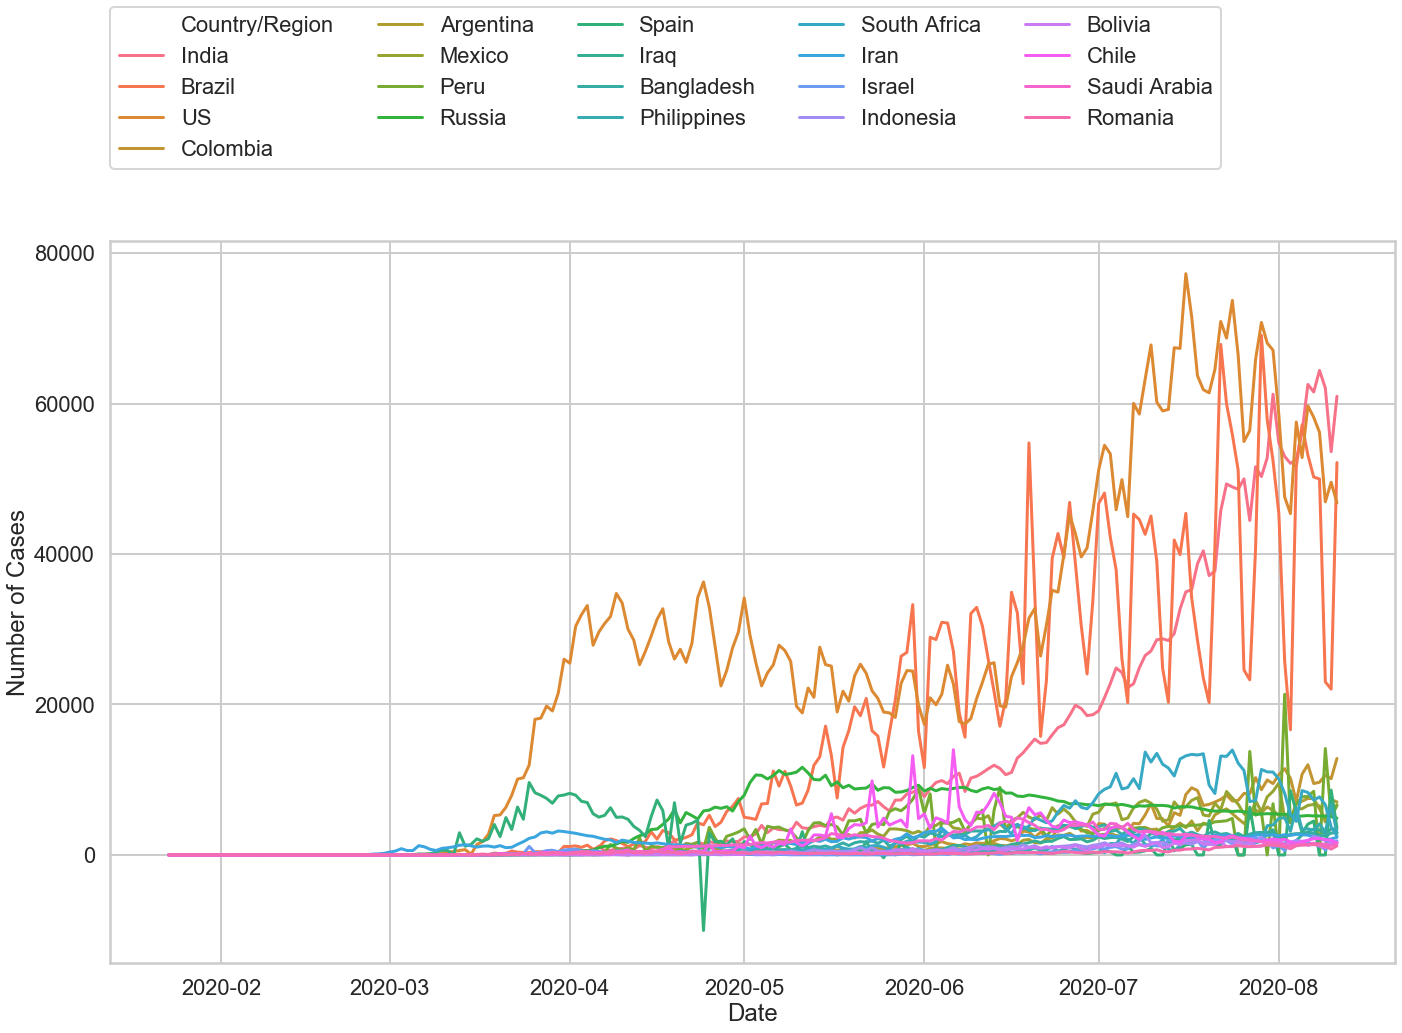

In [29]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,15))

sns.lineplot(data = df_new, x='Date', y='Number of Cases', hue = 'Country/Region')
plt.legend(ncol = 5,loc = (0,1.1))

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

filt = df_new[df_new.Date == df_new.Date.max()]


#for index, row in filt.iterrows():
#ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
#            xycoords='data')

plt.tight_layout()
plt.savefig('new_daily_cases.png')
plt.show()

# Rolling Average

In [30]:
#now we can find the rolling average
rolling_avg_df = diff_df.rolling(window=7, axis = 1).mean()

In [31]:
merge2 = pd.concat([countries_only_df,rolling_avg_df], axis = 1, join = 'inner')

In [32]:
country_new_daily_cases_rolling_avg = merge2.sort_values(by=merge2.columns[-1], ascending = False)

In [33]:
top_20_countries_roll = country_new_daily_cases_rolling_avg[:20]

In [34]:
countries_rolling_average = pd.melt(frame=top_20_countries_roll, id_vars=['Country/Region','Lat','Long'], value_vars=date_column,  value_name="Number of Cases", var_name="Date")

In [35]:
countries_rolling_average['Date'] = pd.to_datetime(countries_rolling_average['Date'], format='%m/%d/%y') 

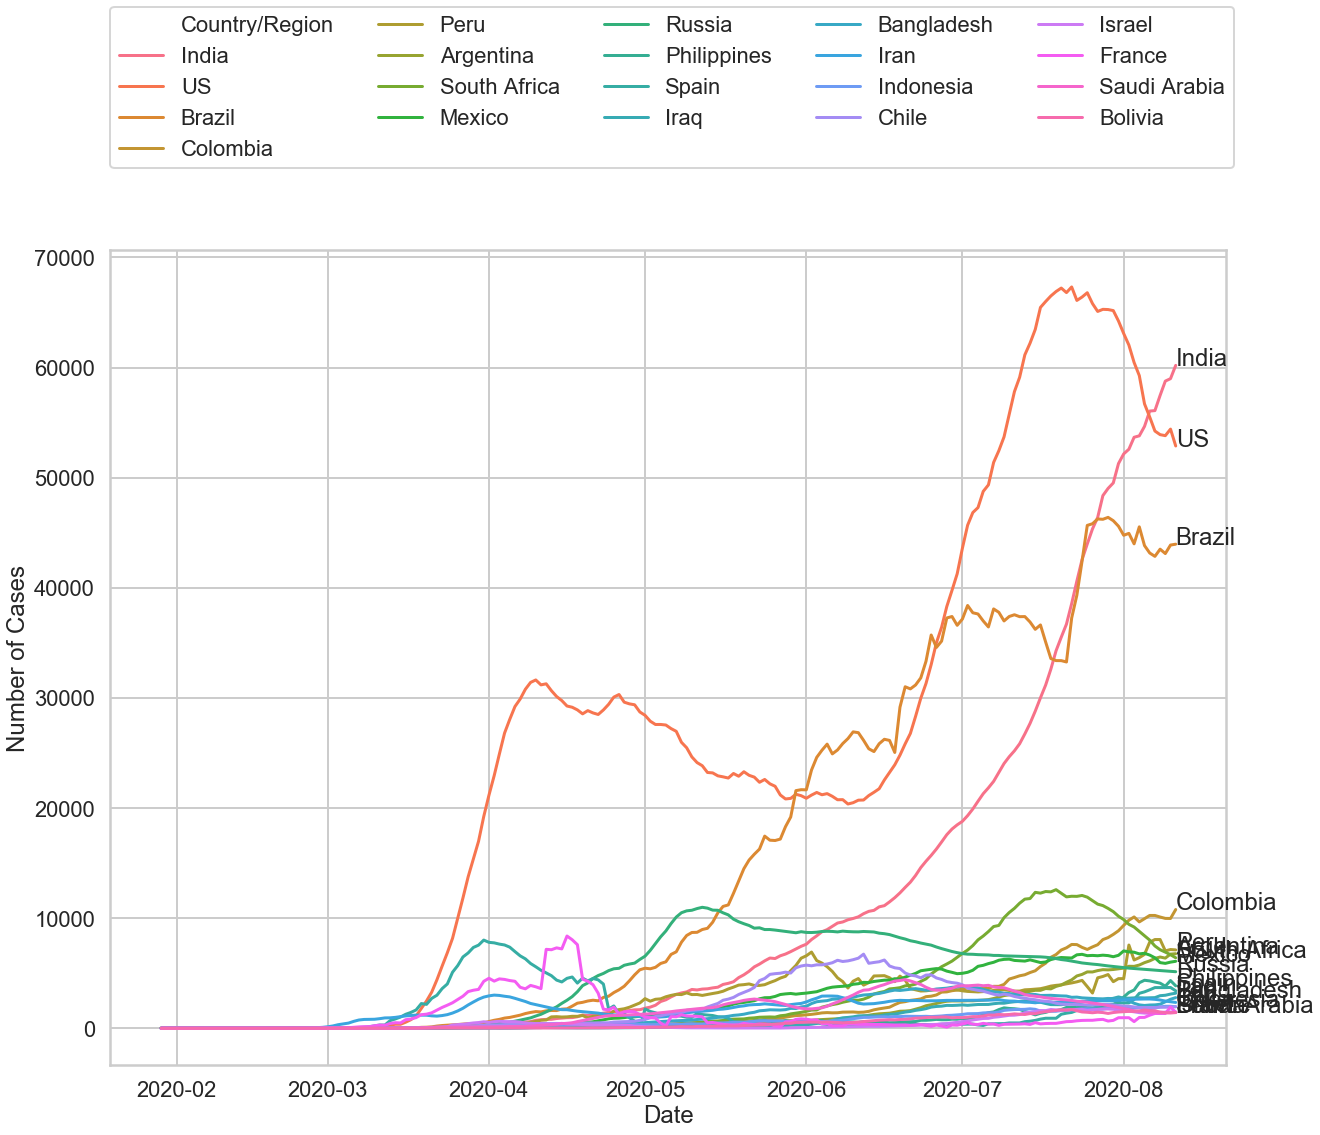

In [36]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,15))

sns.lineplot(data = countries_rolling_average, x='Date', y='Number of Cases', hue = 'Country/Region')
plt.legend(ncol = 5,loc = (0,1.1))

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

filt = countries_rolling_average[df_new.Date == df_new.Date.max()]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

plt.show()

In [37]:
filt[:3]

Country/Region        Lat       Long       Date  Number of Cases
4040          India  20.593684   78.96288 2020-08-11     60197.714286
4041             US  40.000000 -100.00000 2020-08-11     52875.428571
4042         Brazil -14.235000  -51.92530 2020-08-11     43958.428571

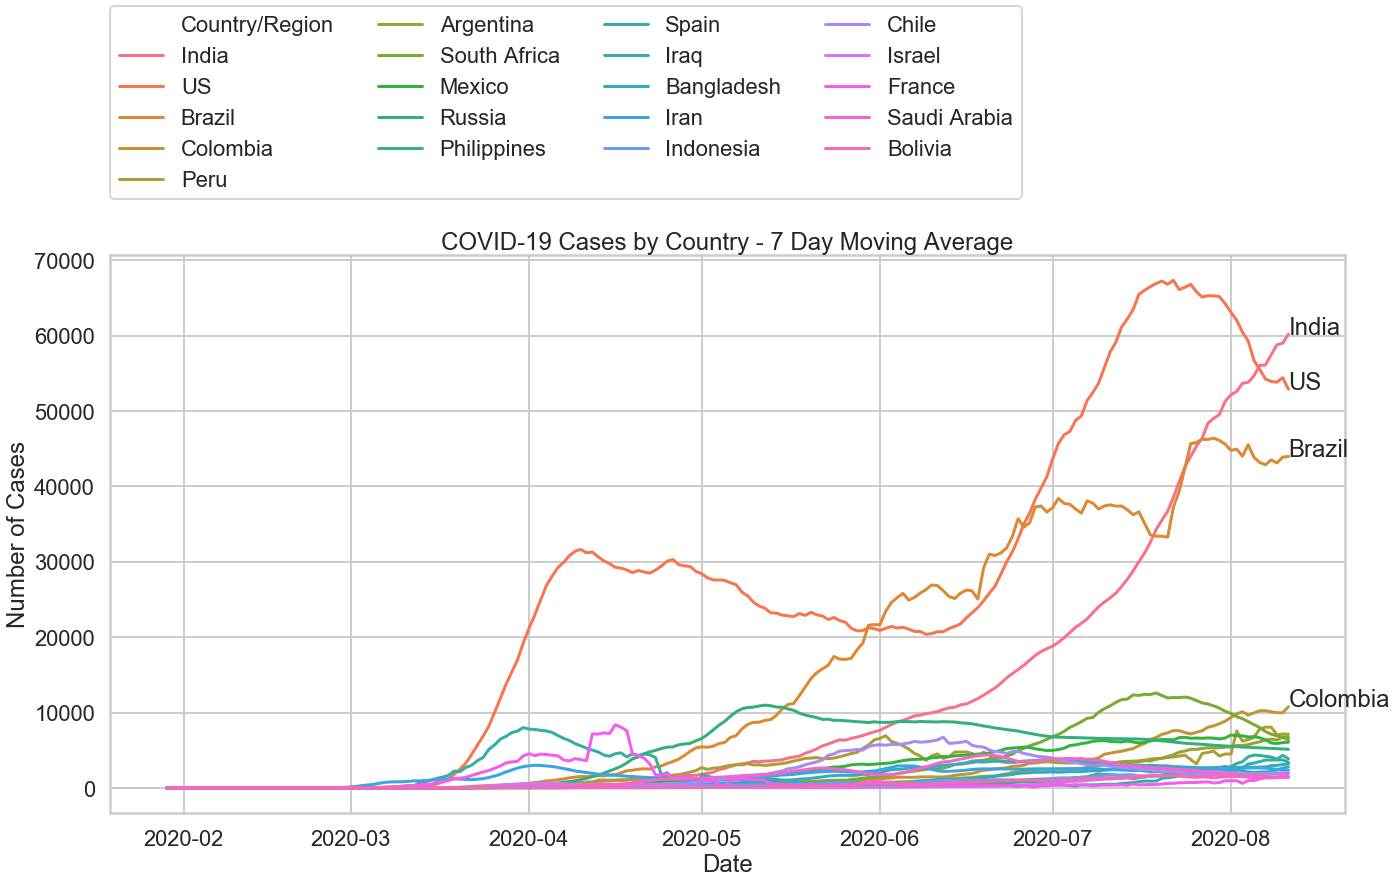

In [38]:
# get a closer look at the lower countries
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,13))

sns.lineplot(data = countries_rolling_average, x='Date', y='Number of Cases', hue = 'Country/Region')

#ax.set_yticks(range(0,8000,1000))
#plt.ylim(0,10000)
#plt.margins(y=12000)

plt.legend(ncol = 4,loc = (0,1.1))
plt.title('COVID-19 Cases by Country - 7 Day Moving Average')

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

#return only the first 4 countries labels becasue the rest just overlap
filt = countries_rolling_average[df_new.Date == df_new.Date.max()][:4]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

f.tight_layout()
plt.savefig('covid_cases_by_country.png')
plt.show()


# Country by Country Data

In [39]:
#fig, axes = plt.subplots(25,1, figsize=(15,150))
#for (year, group), ax in zip(countries_rolling_average.groupby('Country/Region'), axes.flatten()):
#    group.plot(x='Date', y='Number of Cases', kind='line', ax=ax, title=year)
    
#fig.tight_layout()

# Sorting by biggest Change

In [40]:
df_sorted = df_new.sort_values(by = '7 day change', ascending = False)

In [41]:
df_sorted.reset_index()

index Country/Region        Lat        Long  7 day change  Rank  \
0      1611    Philippines  12.879721  121.774017      0.203121  22.0   
1      1731    Philippines  12.879721  121.774017      0.203121  22.0   
2      2371    Philippines  12.879721  121.774017      0.203121  22.0   
3      3091    Philippines  12.879721  121.774017      0.203121  22.0   
4       951    Philippines  12.879721  121.774017      0.203121  22.0   
...     ...            ...        ...         ...           ...   ...   
4055   1998   Saudi Arabia  23.885942   45.079162      0.030563  13.0   
4056   1518   Saudi Arabia  23.885942   45.079162      0.030563  13.0   
4057   1598   Saudi Arabia  23.885942   45.079162      0.030563  13.0   
4058   1318   Saudi Arabia  23.885942   45.079162      0.030563  13.0   
4059   3778   Saudi Arabia  23.885942   45.079162      0.030563  13.0   

           Date  Number of Cases         Country (7 day change)  
0    2020-04-11            233.0  Philippines (20.3%) (Rank 22)  
1    2020-04-17            218.0  Philippines (20.3%) (Rank 22)  
2    2020-05-19            224.0  Philippines (20.3%) (Rank 22)  
3    2020-06-24            470.0  Philippines (20.3%) (Rank 22)  
4    2020-03-09             10.0  Philippines (20.3%) (Rank 22)  
...         ...              ...                            ...  
4055 2020-04-30           1351.0  Saudi Arabia (3.1%) (Rank 13)  
4056 2020-04-06            203.0  Saudi Arabia (3.1%) (Rank 13)  
4057 2020-04-10            364.0  Saudi Arabia (3.1%) (Rank 13)  
4058 2020-03-27             92.0  Saudi Arabia (3.1%) (Rank 13)  
4059 2020-07-28           1897.0  Saudi Arabia (3.1%) (Rank 13)  

[4060 rows x 9 columns]

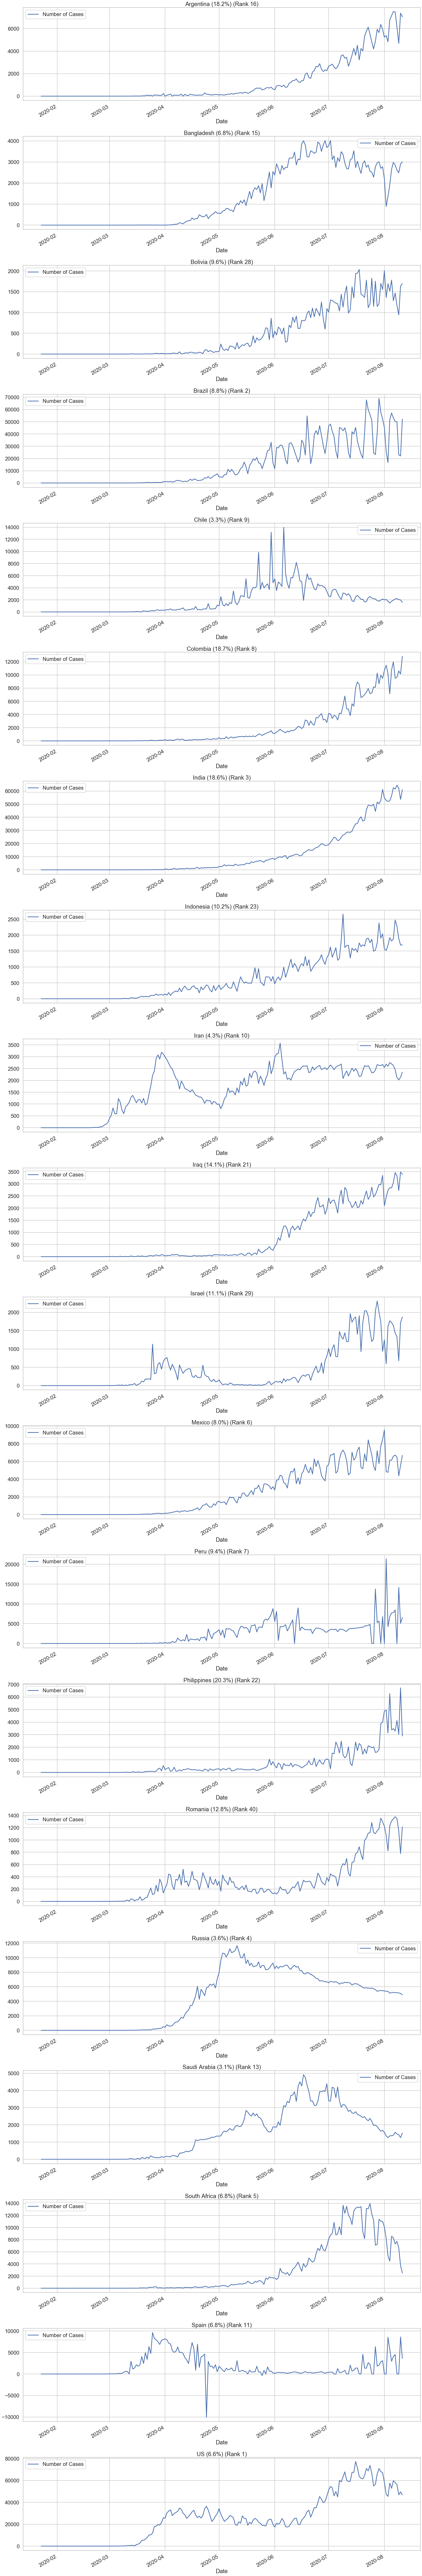

In [42]:
fig, axes = plt.subplots(20,1, figsize=(25,150))
sns.set_context("poster", font_scale = 1)
for (year, group), ax in zip(df_sorted.groupby('Country (7 day change)'), axes.flatten()):
    group.plot(x='Date', y='Number of Cases', kind='line', ax=ax, title=year)
    
fig.tight_layout()
plt.savefig('cases_by_country_individual.png')

# Subplots Round 2

In [61]:
df_country_with_cases = df_sorted[['Country/Region','Date','Number of Cases']].sort_values(by='Date').reset_index(drop=True)

In [62]:
df_country_with_cases

Country/Region       Date  Number of Cases
0                US 2020-01-22              NaN
1       Philippines 2020-01-22              NaN
2      South Africa 2020-01-22              NaN
3             Spain 2020-01-22              NaN
4             Chile 2020-01-22              NaN
...             ...        ...              ...
4055             US 2020-08-11          46808.0
4056   South Africa 2020-08-11           2511.0
4057           Peru 2020-08-11           6547.0
4058           Iraq 2020-08-11           3396.0
4059          India 2020-08-11          60963.0

[4060 rows x 3 columns]

In [55]:
#Sort by highest cases
yesterday = df_country_with_cases['Date'] == df_country_with_cases['Date'].max()

countries_list = df_country_with_cases.loc[yesterday].sort_values(by='Number of Cases', ascending = False)['Country/Region'].tolist()

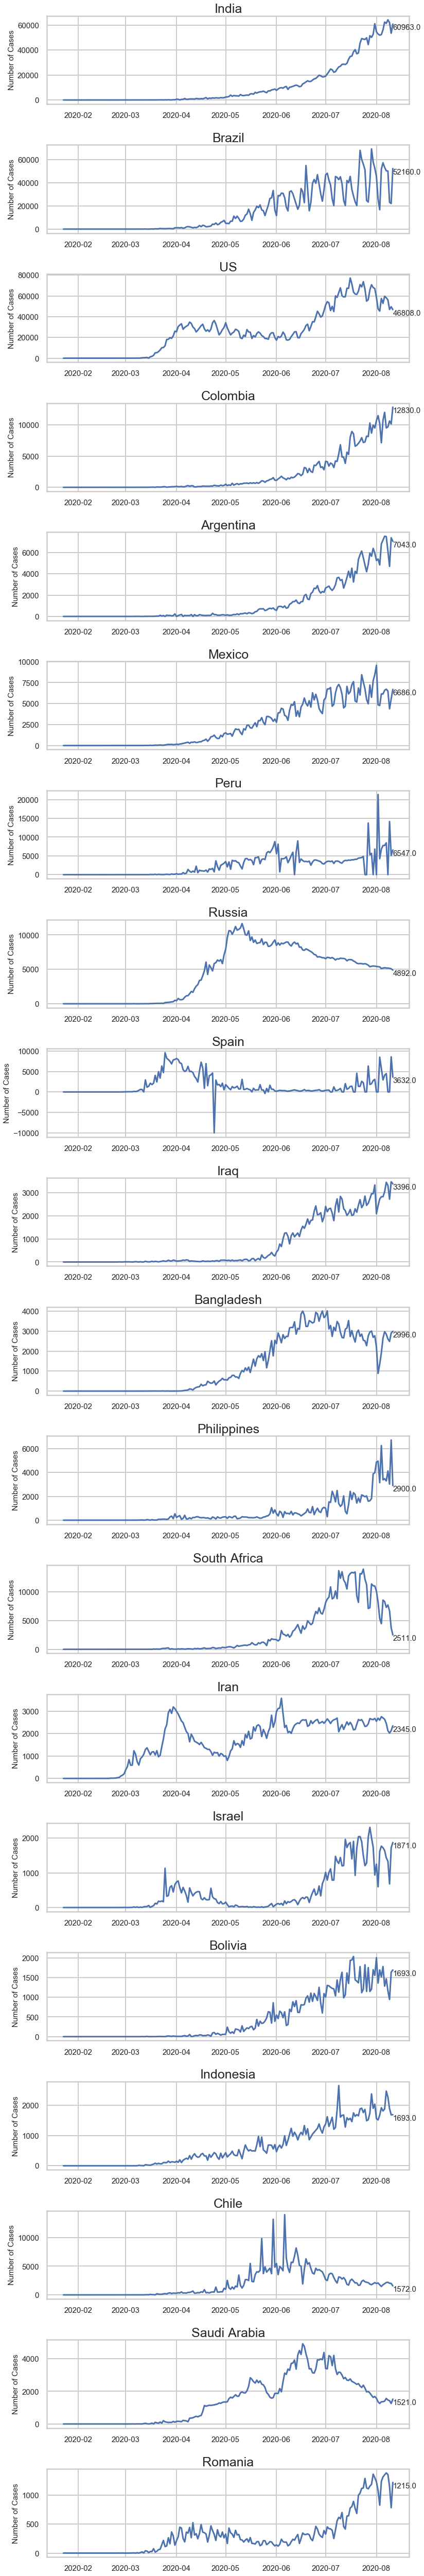

In [77]:
plt.clf
countries_list_top_20 = countries_list[:20]
fig, ax = plt.subplots(nrows=len(countries_list_top_20), figsize=(12,len(countries_list_top_20)*3.5)) #dynamically set the figure size from the number of subplots. I find that 3.5 is a good height per subplot to see the data

for i in countries_list_top_20:
    ind = countries_list_top_20.index(i) #a trick to get a list of 0 to whatever 
    filt = df_country_with_cases['Country/Region'] == i
    
    ax[ind].plot(df_country_with_cases.loc[filt]['Date'],df_country_with_cases.loc[filt]['Number of Cases'])
    
    ax[ind].set_title(i, size=25) #here I am setting the title of each subplot to be the category
    ax[ind].set_ylabel('Number of Cases', size=15)
    ax[ind].xaxis.set_tick_params(labelsize=15)
    ax[ind].yaxis.set_tick_params(labelsize=15)
    
    #Optionally add data points
    cases_yesterday_filter = (df_country_with_cases['Date'] == df_country_with_cases['Date'].max()) & (df_country_with_cases['Country/Region'] == i)
    cases_yesterday = df_country_with_cases.loc[cases_yesterday_filter].iloc[0]['Number of Cases']
    ax[ind].annotate(str(cases_yesterday), xy=(df_country_with_cases['Date'].max(),cases_yesterday),xycoords = 'data', ha ='left', va='top', fontsize =15)

plt.tight_layout()

# States

In [42]:
states_df = pd.read_csv('covid_datasets/us-states.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcadb55090>,
      dtype=object)

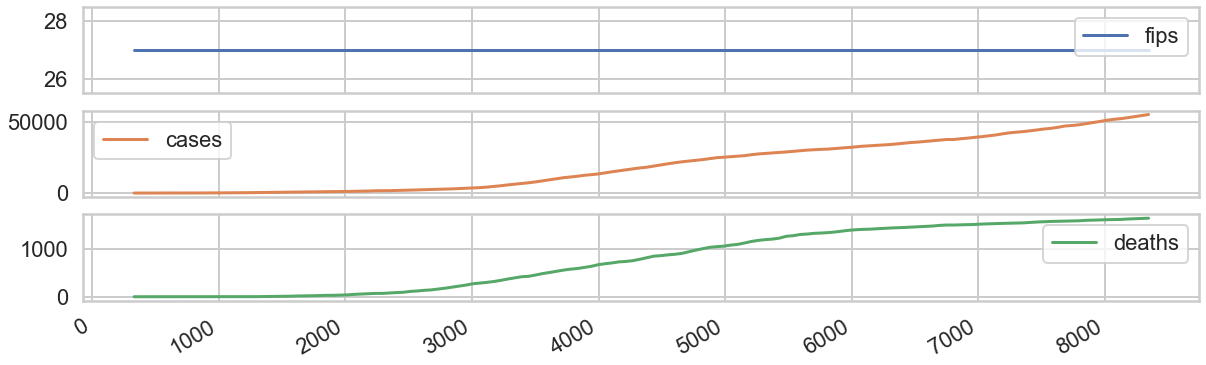

In [68]:
states_df[states_df['state'] == 'Minnesota'].plot(subplots = True, figsize = (20,6))

In [44]:
#states_df['date'] = pd.to_datetime(df_new['Date'], format='%Y-%m/%d') 

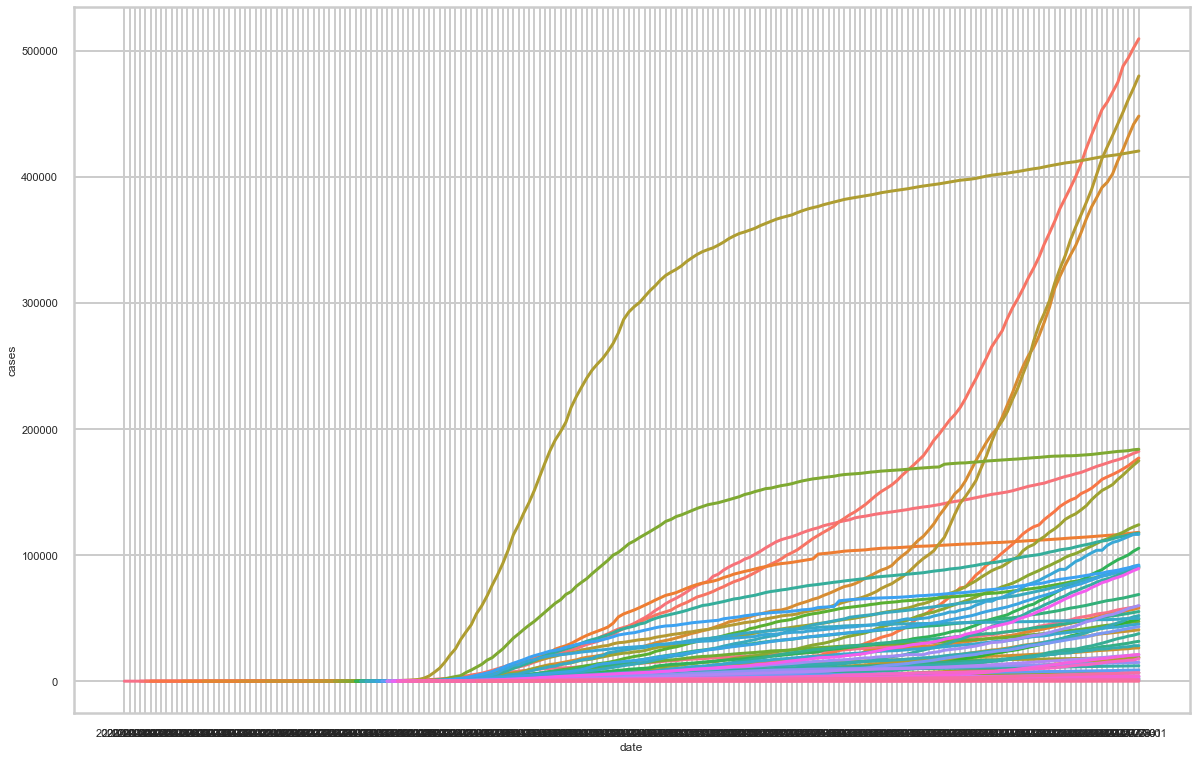

In [45]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 0.5)
f, ax = plt.subplots(figsize=(20,13))

sns.lineplot(data = states_df, x='date', y='cases', hue = 'state')
ax.get_legend().remove()

In [46]:
states_df.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [47]:
states_pivoted = pd.pivot_table(states_df, values='cases', index='state',columns='date', aggfunc=np.sum, fill_value=0)

In [48]:
states_pivoted

date                      2020-01-21  2020-01-22  2020-01-23  2020-01-24  \
state                                                                      
Alabama                            0           0           0           0   
Alaska                             0           0           0           0   
Arizona                            0           0           0           0   
Arkansas                           0           0           0           0   
California                         0           0           0           0   
Colorado                           0           0           0           0   
Connecticut                        0           0           0           0   
Delaware                           0           0           0           0   
District of Columbia               0           0           0           0   
Florida                            0           0           0           0   
Georgia                            0           0           0           0   
Guam                               0           0           0           0   
Hawaii                             0           0           0           0   
Idaho                              0           0           0           0   
Illinois                           0           0           0           1   
Indiana                            0           0           0           0   
Iowa                               0           0           0           0   
Kansas                             0           0           0           0   
Kentucky                           0           0           0           0   
Louisiana                          0           0           0           0   
Maine                              0           0           0           0   
Maryland                           0           0           0           0   
Massachusetts                      0           0           0           0   
Michigan                           0           0           0           0   
Minnesota                          0           0           0           0   
Mississippi                        0           0           0           0   
Missouri                           0           0           0           0   
Montana                            0           0           0           0   
Nebraska                           0           0           0           0   
Nevada                             0           0           0           0   
New Hampshire                      0           0           0           0   
New Jersey                         0           0           0           0   
New Mexico                         0           0           0           0   
New York                           0           0           0           0   
North Carolina                     0           0           0           0   
North Dakota                       0           0           0           0   
Northern Mariana Islands           0           0           0           0   
Ohio                               0           0           0           0   
Oklahoma                           0           0           0           0   
Oregon                             0           0           0           0   
Pennsylvania                       0           0           0           0   
Puerto Rico                        0           0           0           0   
Rhode Island                       0           0           0           0   
South Carolina                     0           0           0           0   
South Dakota                       0           0           0           0   
Tennessee                          0           0           0           0   
Texas                              0           0           0           0   
Utah                               0           0           0           0   
Vermont                            0           0           0           0   
Virgin Islands                     0           0           0           0   
Virginia                           0           0

In [49]:
states_diff_df = states_pivoted.diff(axis=1)

In [50]:
states_rolling_df = states_diff_df.rolling(window=7, axis = 1).mean()

In [51]:
states_rolling_df = states_rolling_df.reset_index()

In [52]:
states_rolling_df.columns[1:]

Index(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
       ...
       '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27',
       '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01'],
      dtype='object', name='date', length=194)

In [53]:
new_states_rolling_df = pd.melt(frame = states_rolling_df.reset_index(), id_vars='state', value_vars=states_rolling_df.columns[1:],  value_name="Number of Cases", var_name="Date")

In [54]:
new_states_rolling_df['Date'] = pd.to_datetime(new_states_rolling_df['Date'], format='%Y-%m-%d') 

In [55]:
# see the highest number of cases for each state
state_worst_day = new_states_rolling_df.loc[new_states_rolling_df.reset_index().groupby(['state'])['Number of Cases'].idxmax()].sort_values(by="Number of Cases", ascending=False)
state_worst_day

state       Date  Number of Cases
9799                    Florida 2020-07-17     11870.000000
9946                      Texas 2020-07-19     10460.714286
10234                California 2020-07-25     10019.000000
4433                   New York 2020-04-10      9877.285714
9187                    Arizona 2020-07-06      3848.571429
4266                 New Jersey 2020-04-07      3674.285714
10460                   Georgia 2020-07-29      3489.571429
5734                   Illinois 2020-05-04      2565.285714
5467              Massachusetts 2020-04-29      2474.428571
10660                 Tennessee 2020-08-01      2428.000000
10304                 Louisiana 2020-07-26      2267.142857
9769             North Carolina 2020-07-16      2017.285714
9833             South Carolina 2020-07-17      1948.714286
9900                    Alabama 2020-07-19      1917.714286
4440               Pennsylvania 2020-04-10      1672.571429
4258                   Michigan 2020-04-07      1603.142857
10586                  Missouri 2020-07-31      1403.000000
10310               Mississippi 2020-07-26      1380.857143
9882                       Ohio 2020-07-18      1372.571429
7255                   Virginia 2020-05-31      1194.714286
9984                     Nevada 2020-07-20      1172.571429
6841                   Maryland 2020-05-24      1142.714286
10543                  Oklahoma 2020-07-30      1105.857143
5066                Connecticut 2020-04-22      1102.000000
10338                 Wisconsin 2020-07-26       961.714286
9896                 Washington 2020-07-18       937.571429
10245                   Indiana 2020-07-25       855.000000
10453                  Arkansas 2020-07-29       817.428571
10474                 Minnesota 2020-07-29       712.285714
10248                  Kentucky 2020-07-25       663.571429
9617                       Utah 2020-07-13       661.285714
10400                  Colorado 2020-07-28       609.714286
9751                       Iowa 2020-07-16       585.428571
9913                      Idaho 2020-07-19       569.857143
9807                     Kansas 2020-07-17       485.714286
10656               Puerto Rico 2020-08-01       476.000000
5968                   Nebraska 2020-05-08       427.428571
5322               Rhode Island 2020-04-26       390.428571
10049                    Oregon 2020-07-21       346.142857
10482                New Mexico 2020-07-29       329.714286
5397                   Delaware 2020-04-28       234.857143
5838       District of Columbia 2020-05-06       193.571429
10447             West Virginia 2020-07-28       139.142857
10616                    Alaska 2020-08-01       137.000000
6259               South Dakota 2020-05-13       136.142857
10430              North Dakota 2020-07-28       133.428571
10532                   Montana 2020-07-30       129.285714
5915              New Hampshire 2020-05-07        99.571429
10627                    Hawaii 2020-08-01        82.428571
4466                       Guam 2020-04-11        65.428571
6840                      Maine 2020-05-24        52.571429
10449                   Wyoming 2020-07-28        50.142857
4393                    Vermont 2020-04-09        41.428571
9674             Virgin Islands 2020-07-14        17.285714
3996   Northern Mariana Islands 2020-04-02         1.142857

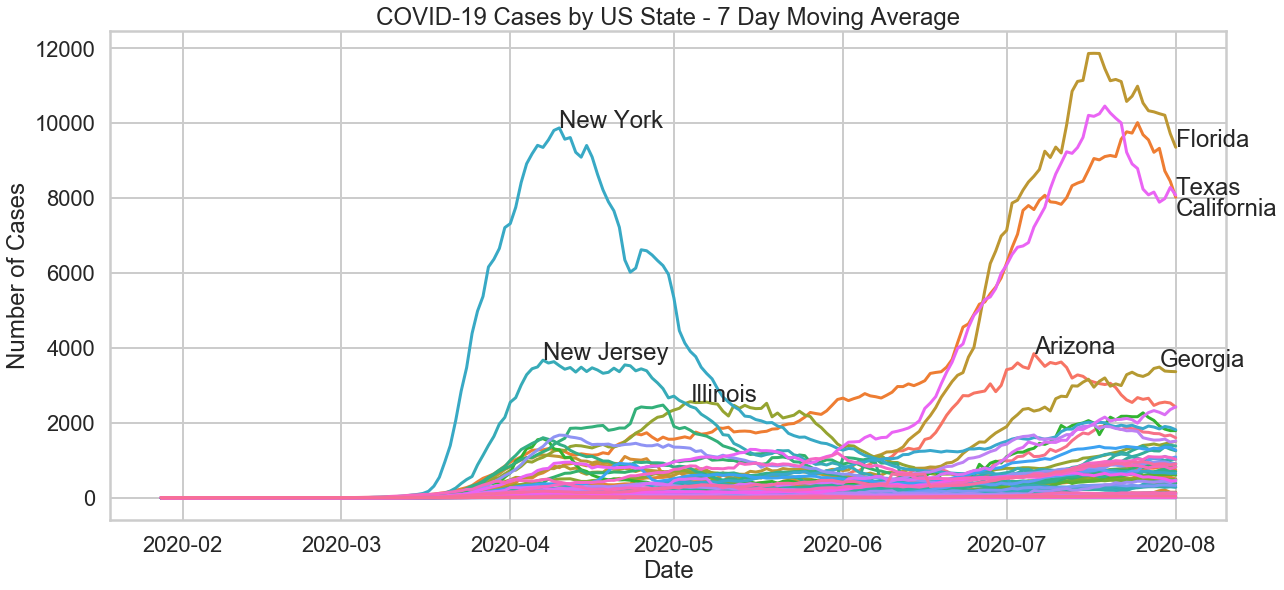

In [78]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,9))

sns.lineplot(data = new_states_rolling_df, x='Date', y='Number of Cases', hue = 'state')

#plt.legend(ncol = 5,loc = (0,1.1))
plt.title('COVID-19 Cases by US State - 7 Day Moving Average')

date_filter = new_states_rolling_df['Date'] == new_states_rolling_df['Date'].max()
state_labels = new_states_rolling_df.loc[date_filter].sort_values(by="Number of Cases", ascending = False)[:2]
third_state = new_states_rolling_df.loc[date_filter].sort_values(by="Number of Cases", ascending = False)[2:3]

#Top 2 States
for index, row in state_labels.iterrows():
    ax.annotate(row['state'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')
#California because it overlaps with Texas
for index, row in third_state.iterrows():
    ax.annotate(row['state'], xy=(row['Date'], row['Number of Cases']-500),  
            xycoords='data')

    
#Add Data Labels for specific states with select states with a spike in cases
select_states = ["New York", "New Jersey", "Arizona", "Illinois", "Georgia"]
for i in select_states:
    ax.annotate(i, xy=(state_worst_day.loc[state_worst_day['state'] == i]['Date'],state_worst_day.loc[state_worst_day['state'] == i]['Number of Cases']))
#ax.annotate("New Jersey", xy=(state_worst_day.loc[state_worst_day['state'] == 'New Jersey']['Date'],state_worst_day.loc[state_worst_day['state'] == 'New Jersey']['Number of Cases']))
ax.get_legend().remove()

    
#f.tight_layout()
plt.savefig('covid_cases_by_state.png')
plt.show()


In [57]:
filt

Country/Region        Lat       Long       Date  Number of Cases
3840             US  40.000000 -100.00000 2020-08-01     63067.714286
3841          India  20.593684   78.96288 2020-08-01     52155.428571
3842         Brazil -14.235000  -51.92530 2020-08-01     44766.285714
3843   South Africa -30.559500   22.93750 2020-08-01      9870.000000

# Quick Testing

In [58]:
test_df = countries_df[['7/17/20','7/18/20','7/19/20','7/20/20','7/21/20','7/22/20']]

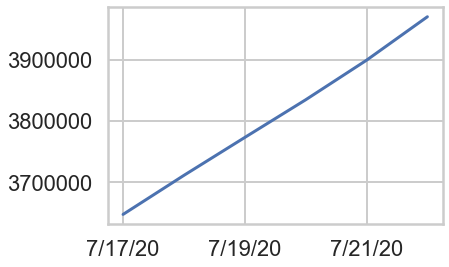

In [59]:
test_df.iloc[225].plot()